# Plot output from OSG

In the [demo to run python on the open science grid (OSG)](https://github.com/srcole/demo_OSG_python), we generated compressed numpy files that contain our results.

In this notebook, we extract these results and plot them on our data to confirm that our program ran correctly.

In this version, I am running it from my Mac. I made and used a 'python27' virt env in anaconda and ran `python fabfile_getdataonly.py`

### 1. Load each array of Ps and Ts

In [2]:
import numpy as np
Nfiles = 10
Ps = np.zeros(Nfiles, dtype=np.ndarray)
Ts = np.zeros(Nfiles, dtype=np.ndarray)
for n in range(Nfiles):
    Ps[n] = np.load('/gh/data/example/lfp_set_PsTs2/' + str(n) + '/out/Ps_data.npy')
    Ts[n] = np.load('/gh/data/example/lfp_set_PsTs2/' + str(n) + '/out/Ts_data.npy')

### 2. Load signals

In [3]:
lfps = np.zeros(Nfiles, dtype=np.ndarray)
for n in range(Nfiles):
    if n == 0:
        lfps[n] = np.load('/gh/data/example/lfp_set/' + str(10) + '.npy')
    else:
        lfps[n] = np.load('/gh/data/example/lfp_set/' + str(n) + '.npy')

### 3. Plot peaks and troughs on top of signals

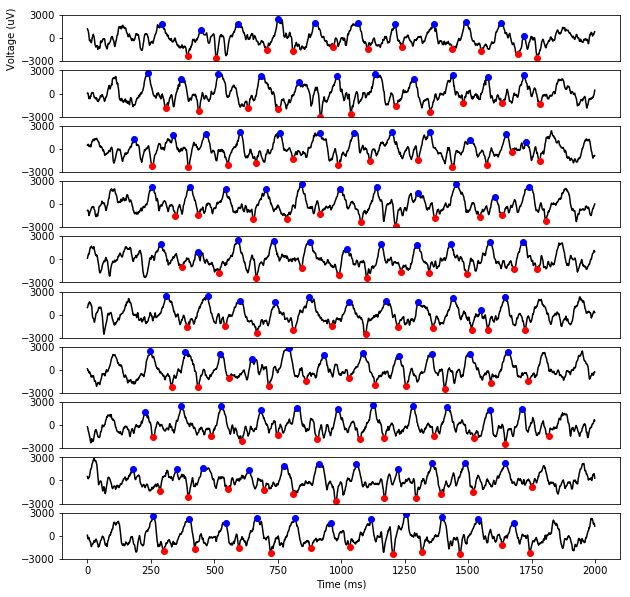

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for n in range(Nfiles):
    plt.subplot(Nfiles, 1, n+1)
    plt.plot(lfps[n], 'k')
    plt.plot(Ps[n], lfps[n][Ps[n]], 'bo')
    plt.plot(Ts[n], lfps[n][Ts[n]], 'ro')
    if n == Nfiles-1:
        plt.xlabel('Time (ms)')
    else:
        plt.xticks([])
    plt.ylim((-3000,3000))
    plt.yticks([-3000,0,3000])
    if n == 0:
        plt.ylabel('Voltage (uV)')
    